# Research Question

Is there a difference President Trump's Polling Numbers depending on the polling methodology?

# Hypothesis

H0: There is no difference in President Trump's polling numbers depending on the polling methodology.

H1: There is a difference in President Trump's polling numbers depending on the polling methodology.

# Wrangle Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

data = pd.read_csv('president_polls.csv')

In [2]:
data

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,135712,72333,2020,Michigan,383,Public Policy Polling,338,Progress Michigan,Public Policy Polling,263.0,...,10/30/20 15:02,NaN,https://progressmichigan.org/wp-content/upload...,general,6233,Biden,13256,Joseph R. Biden Jr.,DEM,54.0
1,135712,72333,2020,Michigan,383,Public Policy Polling,338,Progress Michigan,Public Policy Polling,263.0,...,10/30/20 15:02,NaN,https://progressmichigan.org/wp-content/upload...,general,6233,Trump,13254,Donald Trump,REP,44.0
2,135712,72333,2020,Michigan,383,Public Policy Polling,338,Progress Michigan,Public Policy Polling,263.0,...,10/30/20 15:02,NaN,https://progressmichigan.org/wp-content/upload...,general,6233,Jorgensen,14611,Jo Jorgensen,LIB,1.0
3,135712,72333,2020,Michigan,383,Public Policy Polling,338,Progress Michigan,Public Policy Polling,263.0,...,10/30/20 15:02,NaN,https://progressmichigan.org/wp-content/upload...,general,6233,Hawkins,14612,Howie Hawkins,GRE,0.0
4,135859,72405,2020,Minnesota,383,Public Policy Polling,NaN,NaN,Public Policy Polling,263.0,...,10/31/20 11:13,NaN,https://www.publicpolicypolling.com/wp-content...,general,6234,Biden,13256,Joseph R. Biden Jr.,DEM,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15108,92081,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:45,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,46.0
15109,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Warren,13258,Elizabeth Warren,DEM,43.0
15110,92082,57026,2020,Ohio,383,Public Policy Polling,1363,DEM (partisan),Public Policy Polling,263.0,...,12/6/18 14:46,NaN,https://www.cleveland.com/politics/2018/11/thi...,general,6246,Trump,13254,Donald Trump,REP,49.0
15111,92078,57025,2020,NaN,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,12/6/18 14:40,NaN,http://www.rasmussenreports.com/public_content...,general,6210,Obama,13253,Michelle Obama,DEM,50.0


# Data Cleaning

#### Getting Variable Type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15113 entries, 0 to 15112
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   question_id                15113 non-null  int64  
 1   poll_id                    15113 non-null  int64  
 2   cycle                      15113 non-null  int64  
 3   state                      10175 non-null  object 
 4   pollster_id                15113 non-null  int64  
 5   pollster                   15113 non-null  object 
 6   sponsor_ids                9143 non-null   object 
 7   sponsors                   9143 non-null   object 
 8   display_name               15113 non-null  object 
 9   pollster_rating_id         15100 non-null  float64
 10  pollster_rating_name       15100 non-null  object 
 11  fte_grade                  14038 non-null  object 
 12  sample_size                15107 non-null  float64
 13  population                 15113 non-null  obj

In [4]:
data = data.drop(['poll_id', 'question_id', 'notes', 'url', 'display_name', 'pollster_id', 'sponsor_ids', 'pollster_rating_id', 'pollster_rating_name', 'office_type', 'stage', 'seat_name', 'seat_number', 'election_date'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15113 entries, 0 to 15112
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cycle                      15113 non-null  int64  
 1   state                      10175 non-null  object 
 2   pollster                   15113 non-null  object 
 3   sponsors                   9143 non-null   object 
 4   fte_grade                  14038 non-null  object 
 5   sample_size                15107 non-null  float64
 6   population                 15113 non-null  object 
 7   population_full            15113 non-null  object 
 8   methodology                15051 non-null  object 
 9   start_date                 15113 non-null  object 
 10  end_date                   15113 non-null  object 
 11  sponsor_candidate          54 non-null     object 
 12  internal                   15113 non-null  bool   
 13  partisan                   731 non-null    obj

In [5]:
for column_name in data.columns:
    print("Unique values in column {} are: {}".format(column_name, data[column_name].unique()))

Unique values in column cycle are: [2020]
Unique values in column state are: ['Michigan' 'Minnesota' nan 'North Carolina' 'Florida' 'Pennsylvania'
 'Nevada' 'Missouri' 'Texas' 'Arizona' 'Virginia' 'Wyoming'
 'West Virginia' 'Wisconsin' 'Washington' 'Vermont' 'Utah' 'Tennessee'
 'South Dakota' 'South Carolina' 'Rhode Island' 'Oregon' 'Oklahoma' 'Ohio'
 'New York' 'New Mexico' 'New Jersey' 'New Hampshire' 'Nebraska'
 'North Dakota' 'Montana' 'Mississippi' 'Maine' 'Maryland' 'Massachusetts'
 'Louisiana' 'Kentucky' 'Kansas' 'Illinois' 'Idaho' 'Iowa' 'Hawaii'
 'Georgia' 'Delaware' 'District of Columbia' 'Connecticut' 'California'
 'Arkansas' 'Alabama' 'Alaska' 'Indiana' 'Colorado' 'Maine CD-2'
 'Maine CD-1' 'Nebraska CD-2' 'Nebraska CD-1']
Unique values in column pollster are: ['Public Policy Polling' 'IBD/TIPP' 'USC Dornsife/Los Angeles Times'
 'Rasmussen Reports/Pulse Opinion Research' 'Trafalgar Group' 'AtlasIntel'
 'Remington Research Group' 'RMG Research'
 'Fox News/Beacon Research/Sha

#### Missing Data

In [6]:
data.isnull().sum()*100/data.isnull().count()

cycle                         0.000000
state                        32.673857
pollster                      0.000000
sponsors                     39.502415
fte_grade                     7.113081
sample_size                   0.039701
population                    0.000000
population_full               0.000000
methodology                   0.410243
start_date                    0.000000
end_date                      0.000000
sponsor_candidate            99.642692
internal                      0.000000
partisan                     95.163105
tracking                     62.284126
nationwide_batch              0.000000
ranked_choice_reallocated     0.000000
created_at                    0.000000
race_id                       0.000000
answer                        0.000000
candidate_id                  0.000000
candidate_name                0.000000
candidate_party               0.000000
pct                           0.000000
dtype: float64

In [7]:
for column in data.select_dtypes(include='object'):
    data[column].fillna('unknown', inplace=True)

In [8]:
data.isnull().sum()*100/data.isnull().count()

cycle                        0.000000
state                        0.000000
pollster                     0.000000
sponsors                     0.000000
fte_grade                    0.000000
sample_size                  0.039701
population                   0.000000
population_full              0.000000
methodology                  0.000000
start_date                   0.000000
end_date                     0.000000
sponsor_candidate            0.000000
internal                     0.000000
partisan                     0.000000
tracking                     0.000000
nationwide_batch             0.000000
ranked_choice_reallocated    0.000000
created_at                   0.000000
race_id                      0.000000
answer                       0.000000
candidate_id                 0.000000
candidate_name               0.000000
candidate_party              0.000000
pct                          0.000000
dtype: float64

In [9]:
for column in data.select_dtypes(include=[np.float64,np.int64]):
    data[column].fillna(data[column].median(), inplace=True)

In [10]:
data.isnull().sum()*100/data.isnull().count()

cycle                        0.0
state                        0.0
pollster                     0.0
sponsors                     0.0
fte_grade                    0.0
sample_size                  0.0
population                   0.0
population_full              0.0
methodology                  0.0
start_date                   0.0
end_date                     0.0
sponsor_candidate            0.0
internal                     0.0
partisan                     0.0
tracking                     0.0
nationwide_batch             0.0
ranked_choice_reallocated    0.0
created_at                   0.0
race_id                      0.0
answer                       0.0
candidate_id                 0.0
candidate_name               0.0
candidate_party              0.0
pct                          0.0
dtype: float64

# Feature Engineering

In [11]:
target_for_values = {
    'Online/IVR': ['IVR/Online']}

for k, v in target_for_values.items():
    data.loc[data['methodology'].isin(v), 'methodology'] = k

In [12]:
Major_Party_Candidates = ['Donald Trump', 'Joseph R. Biden Jr.']

Major_Party_Candidates_data = data[data['candidate_name'].isin(Major_Party_Candidates)]
Major_Party_Candidates_data

,cycle,state,pollster,sponsors,fte_grade,sample_size,population,population_full,methodology,start_date,...,tracking,nationwide_batch,ranked_choice_reallocated,created_at,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,2020,Michigan,Public Policy Polling,Progress Michigan,B,745.0,v,v,Live Phone/Text,10/29/20,...,unknown,False,False,10/30/20 15:02,6233,Biden,13256,Joseph R. Biden Jr.,DEM,54.0
1,2020,Michigan,Public Policy Polling,Progress Michigan,B,745.0,v,v,Live Phone/Text,10/29/20,...,unknown,False,False,10/30/20 15:02,6233,Trump,13254,Donald Trump,REP,44.0
4,2020,Minnesota,Public Policy Polling,unknown,B,770.0,v,v,IVR/Text,10/29/20,...,unknown,False,False,10/31/20 11:13,6234,Biden,13256,Joseph R. Biden Jr.,DEM,54.0
5,2020,Minnesota,Public Policy Polling,unknown,B,770.0,v,v,IVR/Text,10/29/20,...,unknown,False,False,10/31/20 11:13,6234,Trump,13254,Donald Trump,REP,43.0
6,2020,unknown,IBD/TIPP,unknown,A/B,1047.0,lv,lv,Live Phone/Online,10/26/20,...,True,False,False,10/31/20 09:05,6210,Biden,13256,Joseph R. Biden Jr.,DEM,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15105,2020,Ohio,Public Policy Polling,DEM (partisan),B,648.0,v,v,Automated Phone,11/27/18,...,unknown,False,False,12/6/18 14:43,6246,Biden,13256,Joseph R. Biden Jr.,DEM,48.0
15106,2020,Ohio,Public Policy Polling,DEM (partisan),B,648.0,v,v,Automated Phone,11/27/18,...,unknown,False,False,12/6/18 14:43,6246,Trump,13254,Donald Trump,REP,44.0
15108,2020,Ohio,Public Policy Polling,DEM (partisan),B,648.0,v,v,Automated Phone,11/27/18,...,unknown,False,False,12/6/18 14:45,6246,Trump,13254,Donald Trump,REP,46.0
15110,2020,Ohio,Public Policy Polling,DEM (partisan),B,648.0,v,v,Automated Phone,11/27/18,...,unknown,False,False,12/6/18 14:46,6246,Trump,13254,Donald Trump,REP,49.0


In [13]:
Trump = ['Donald Trump']

Trump_data = data[data['candidate_name'].isin(Trump)]
Trump_data

,cycle,state,pollster,sponsors,fte_grade,sample_size,population,population_full,methodology,start_date,...,tracking,nationwide_batch,ranked_choice_reallocated,created_at,race_id,answer,candidate_id,candidate_name,candidate_party,pct
1,2020,Michigan,Public Policy Polling,Progress Michigan,B,745.0,v,v,Live Phone/Text,10/29/20,...,unknown,False,False,10/30/20 15:02,6233,Trump,13254,Donald Trump,REP,44.00
5,2020,Minnesota,Public Policy Polling,unknown,B,770.0,v,v,IVR/Text,10/29/20,...,unknown,False,False,10/31/20 11:13,6234,Trump,13254,Donald Trump,REP,43.00
7,2020,unknown,IBD/TIPP,unknown,A/B,1047.0,lv,lv,Live Phone/Online,10/26/20,...,True,False,False,10/31/20 09:05,6210,Trump,13254,Donald Trump,REP,44.70
11,2020,unknown,IBD/TIPP,unknown,A/B,1047.0,lv,lv,Live Phone/Online,10/26/20,...,True,False,False,10/31/20 09:05,6210,Trump,13254,Donald Trump,REP,44.10
13,2020,unknown,USC Dornsife/Los Angeles Times,unknown,B/C,5244.0,rv,rv,Online,10/17/20,...,True,False,False,10/31/20 08:23,6210,Trump,13254,Donald Trump,REP,42.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15104,2020,Ohio,Public Policy Polling,DEM (partisan),B,648.0,v,v,Automated Phone,11/27/18,...,unknown,False,False,12/6/18 14:41,6246,Trump,13254,Donald Trump,REP,42.00
15106,2020,Ohio,Public Policy Polling,DEM (partisan),B,648.0,v,v,Automated Phone,11/27/18,...,unknown,False,False,12/6/18 14:43,6246,Trump,13254,Donald Trump,REP,44.00
15108,2020,Ohio,Public Policy Polling,DEM (partisan),B,648.0,v,v,Automated Phone,11/27/18,...,unknown,False,False,12/6/18 14:45,6246,Trump,13254,Donald Trump,REP,46.00
15110,2020,Ohio,Public Policy Polling,DEM (partisan),B,648.0,v,v,Automated Phone,11/27/18,...,unknown,False,False,12/6/18 14:46,6246,Trump,13254,Donald Trump,REP,49.00


# Exploratory Data Analysis

In [14]:
Polling_Average_By_Methodology = Trump_data.groupby('methodology', as_index=False)['pct'].mean().sort_values('pct', ascending=False)
display(Polling_Average_By_Methodology)

,methodology,pct
2,IVR/Live Phone/Online,59.600000
13,Text,50.578000
0,Automated Phone,49.307000
11,Online/IVR,47.055574
8,Live Phone/Text,46.144697
14,unknown,45.838462
1,IVR/Live Phone,45.446410
7,Live Phone/Online/Text,45.420000
3,IVR/Online/Text,45.252429
12,Online/Text,45.041954


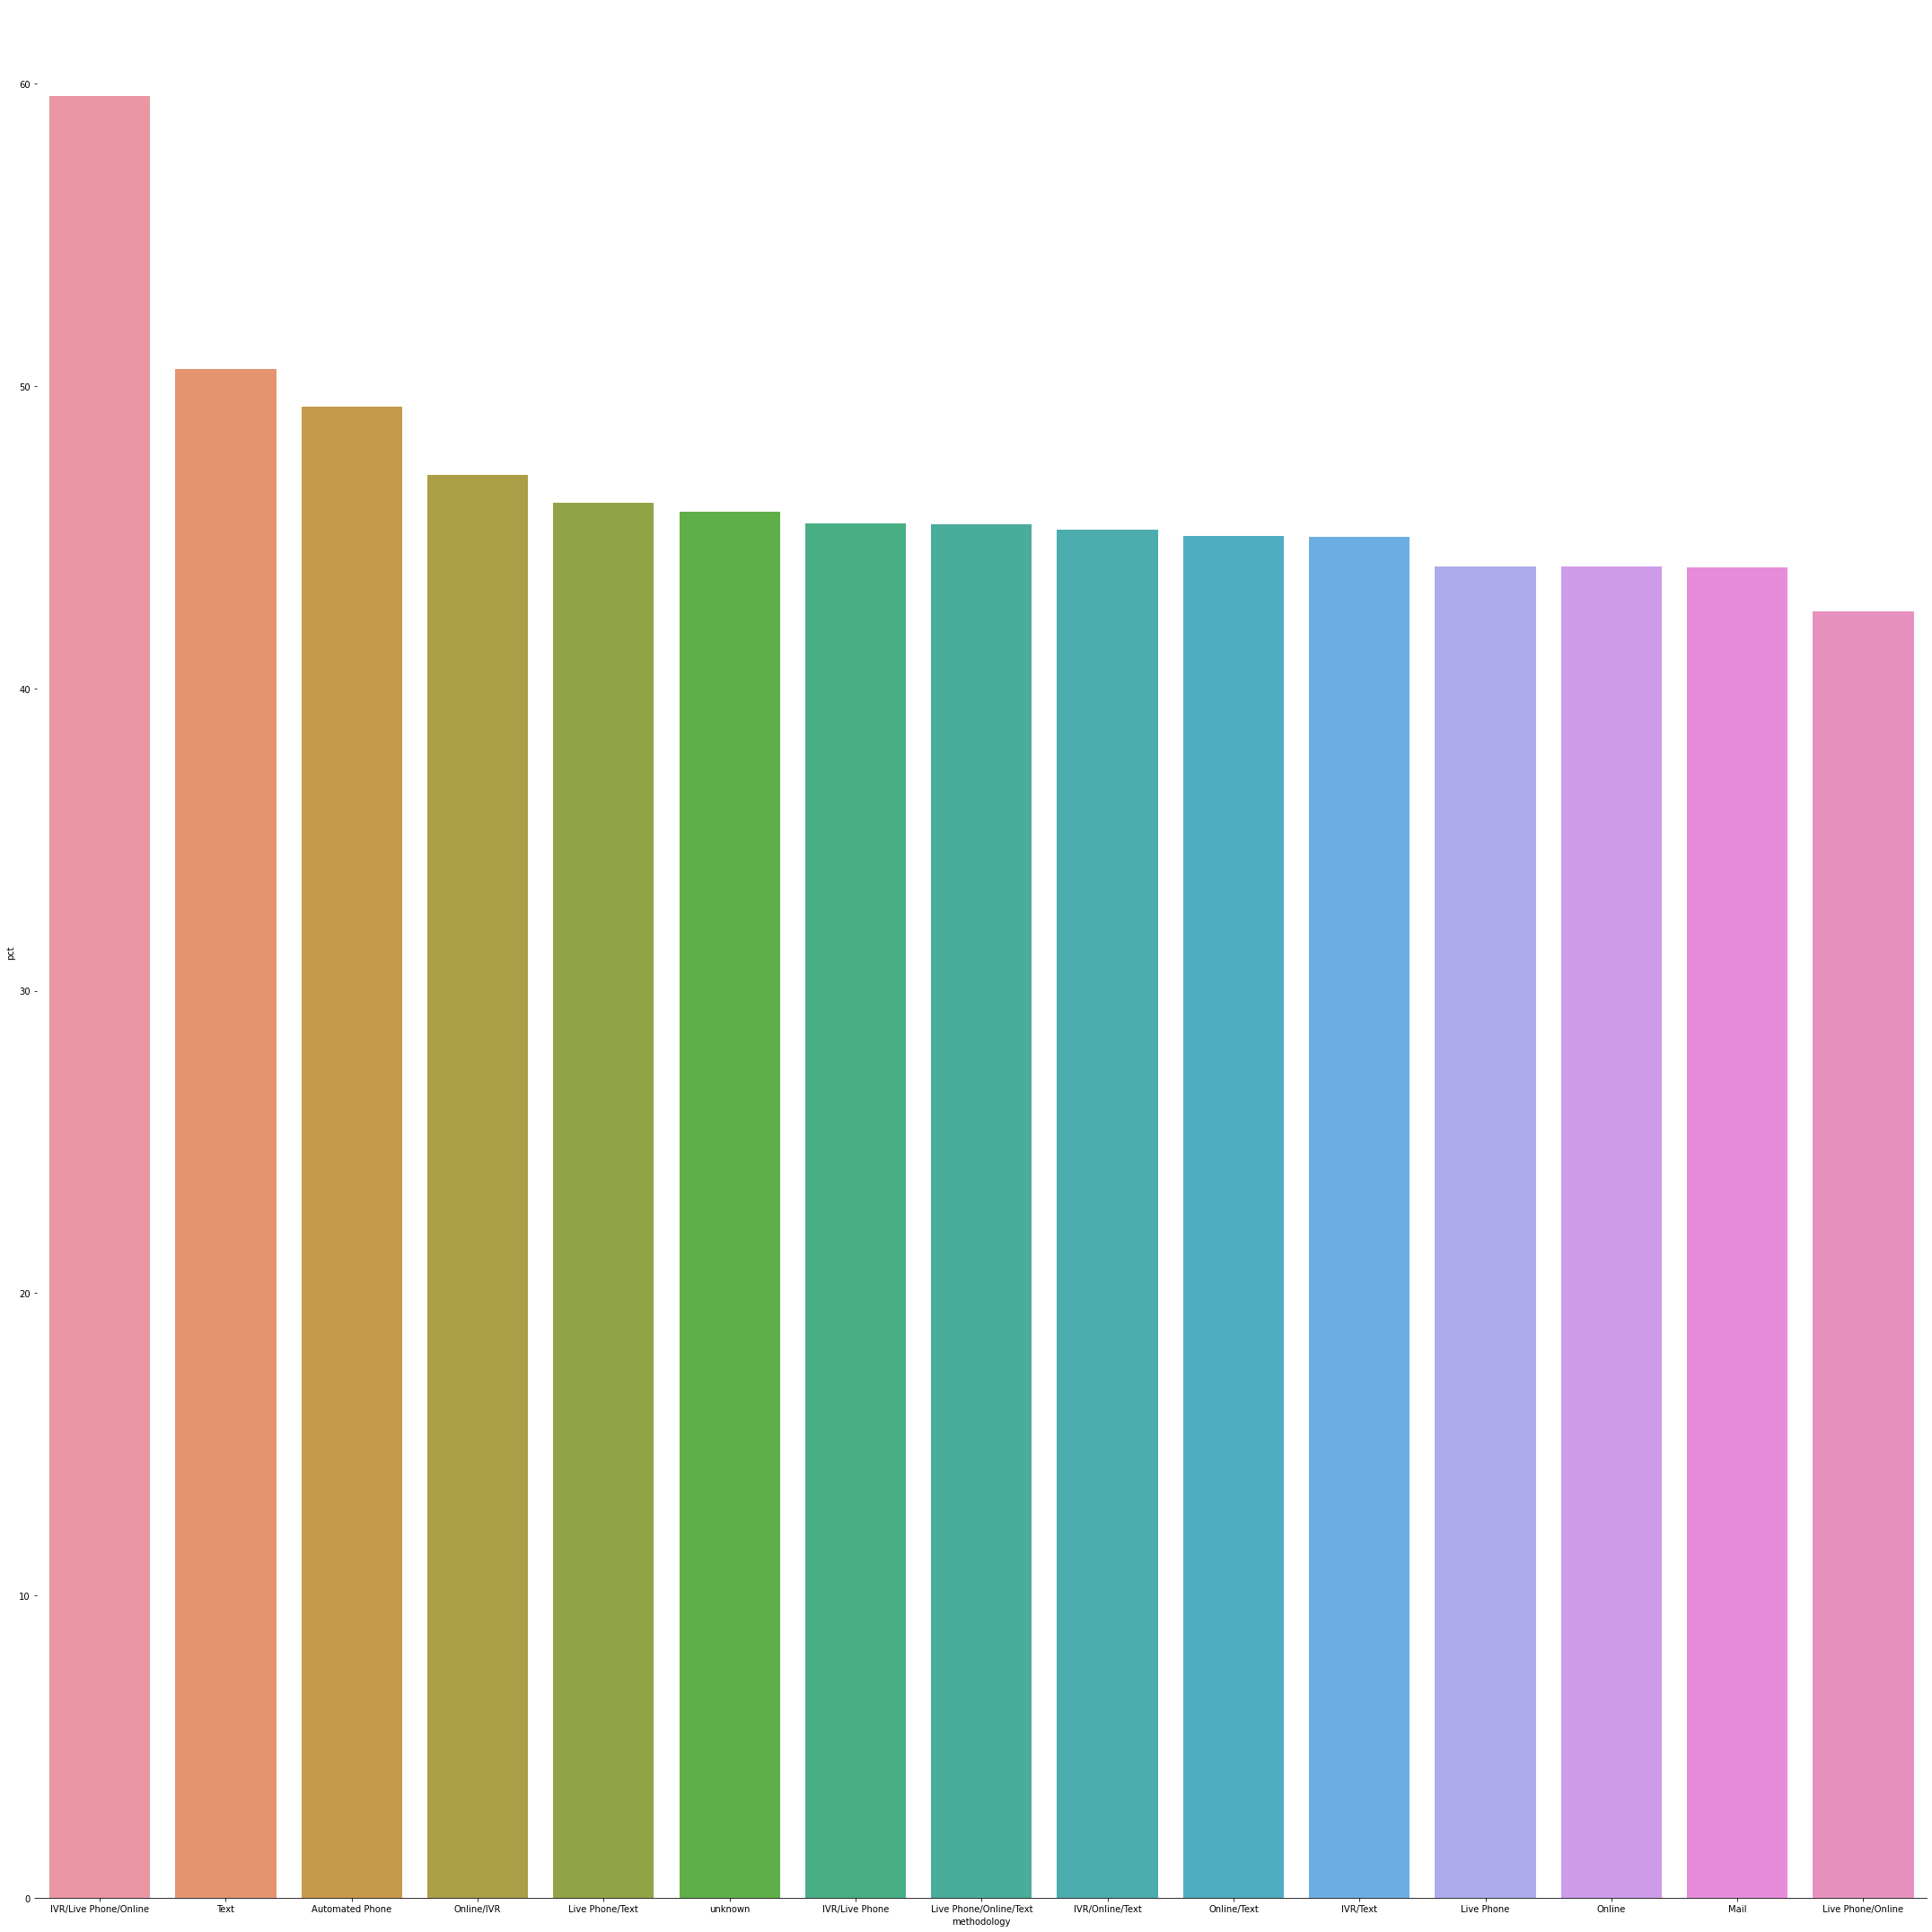

In [15]:
Polling_Average_Graph = sns.catplot(x="methodology", y = 'pct', data=Polling_Average_By_Methodology, height=30, kind="bar")
Polling_Average_Graph.despine(left=True)

In [16]:
Trump_data['methodology'].value_counts()

Online                    4738
Live Phone                1183
Online/IVR                 418
Live Phone/Online          185
IVR/Text                   120
Online/Text                 87
IVR/Online/Text             70
Live Phone/Text             66
Automated Phone             40
IVR/Live Phone              39
unknown                     26
Live Phone/Online/Text       5
Text                         5
Mail                         4
IVR/Live Phone/Online        2
Name: methodology, dtype: int64

In [17]:
Methods = ['Online', 'Live Phone', 'Online/IVR', 'Live Phone/Online', 'IVR/Text', 'Online/Text', 'IVR/Online/Text',
          'Live Phone/Text', 'Automated Phone', 'IVR/Live Phone', 'unknown', 'Live Phone/Online/Text', 'Text', 'Mail']
Trump_data = Trump_data[Trump_data['methodology'].isin(Methods)]
Trump_data

,cycle,state,pollster,sponsors,fte_grade,sample_size,population,population_full,methodology,start_date,...,tracking,nationwide_batch,ranked_choice_reallocated,created_at,race_id,answer,candidate_id,candidate_name,candidate_party,pct
1,2020,Michigan,Public Policy Polling,Progress Michigan,B,745.0,v,v,Live Phone/Text,10/29/20,...,unknown,False,False,10/30/20 15:02,6233,Trump,13254,Donald Trump,REP,44.00
5,2020,Minnesota,Public Policy Polling,unknown,B,770.0,v,v,IVR/Text,10/29/20,...,unknown,False,False,10/31/20 11:13,6234,Trump,13254,Donald Trump,REP,43.00
7,2020,unknown,IBD/TIPP,unknown,A/B,1047.0,lv,lv,Live Phone/Online,10/26/20,...,True,False,False,10/31/20 09:05,6210,Trump,13254,Donald Trump,REP,44.70
11,2020,unknown,IBD/TIPP,unknown,A/B,1047.0,lv,lv,Live Phone/Online,10/26/20,...,True,False,False,10/31/20 09:05,6210,Trump,13254,Donald Trump,REP,44.10
13,2020,unknown,USC Dornsife/Los Angeles Times,unknown,B/C,5244.0,rv,rv,Online,10/17/20,...,True,False,False,10/31/20 08:23,6210,Trump,13254,Donald Trump,REP,42.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15104,2020,Ohio,Public Policy Polling,DEM (partisan),B,648.0,v,v,Automated Phone,11/27/18,...,unknown,False,False,12/6/18 14:41,6246,Trump,13254,Donald Trump,REP,42.00
15106,2020,Ohio,Public Policy Polling,DEM (partisan),B,648.0,v,v,Automated Phone,11/27/18,...,unknown,False,False,12/6/18 14:43,6246,Trump,13254,Donald Trump,REP,44.00
15108,2020,Ohio,Public Policy Polling,DEM (partisan),B,648.0,v,v,Automated Phone,11/27/18,...,unknown,False,False,12/6/18 14:45,6246,Trump,13254,Donald Trump,REP,46.00
15110,2020,Ohio,Public Policy Polling,DEM (partisan),B,648.0,v,v,Automated Phone,11/27/18,...,unknown,False,False,12/6/18 14:46,6246,Trump,13254,Donald Trump,REP,49.00


#### Outliers

Text(0.5, 1.0, 'pct')

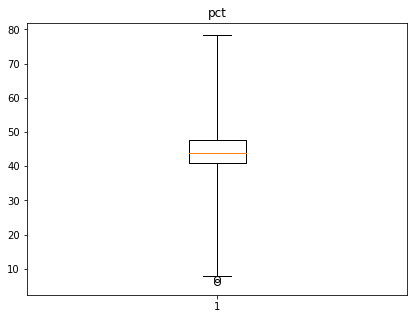

In [18]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(Trump_data['pct'], whis = 5)
plt.title(column)

In [19]:
Trump_data['methodology'].value_counts()

Online                    4738
Live Phone                1183
Online/IVR                 418
Live Phone/Online          185
IVR/Text                   120
Online/Text                 87
IVR/Online/Text             70
Live Phone/Text             66
Automated Phone             40
IVR/Live Phone              39
unknown                     26
Live Phone/Online/Text       5
Text                         5
Mail                         4
Name: methodology, dtype: int64

Text(0.5, 1.0, 'histogram of Trump Polling Percentage')

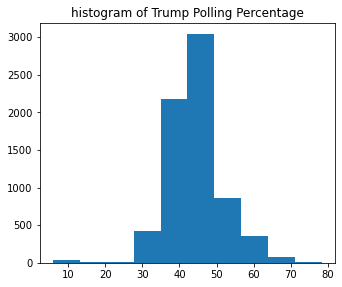

In [20]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(Trump_data["pct"])
plt.title("histogram of Trump Polling Percentage")

In [21]:
from scipy.stats import normaltest
# normality test
stat, p = normaltest(Trump_data['pct'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=509.843, p=0.000
Sample does not look Gaussian (reject H0)


In [22]:
from scipy.stats import anderson
# normality test
result = anderson(Trump_data['pct'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 75.551
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee7fd1d6a0>,
      dtype=object)

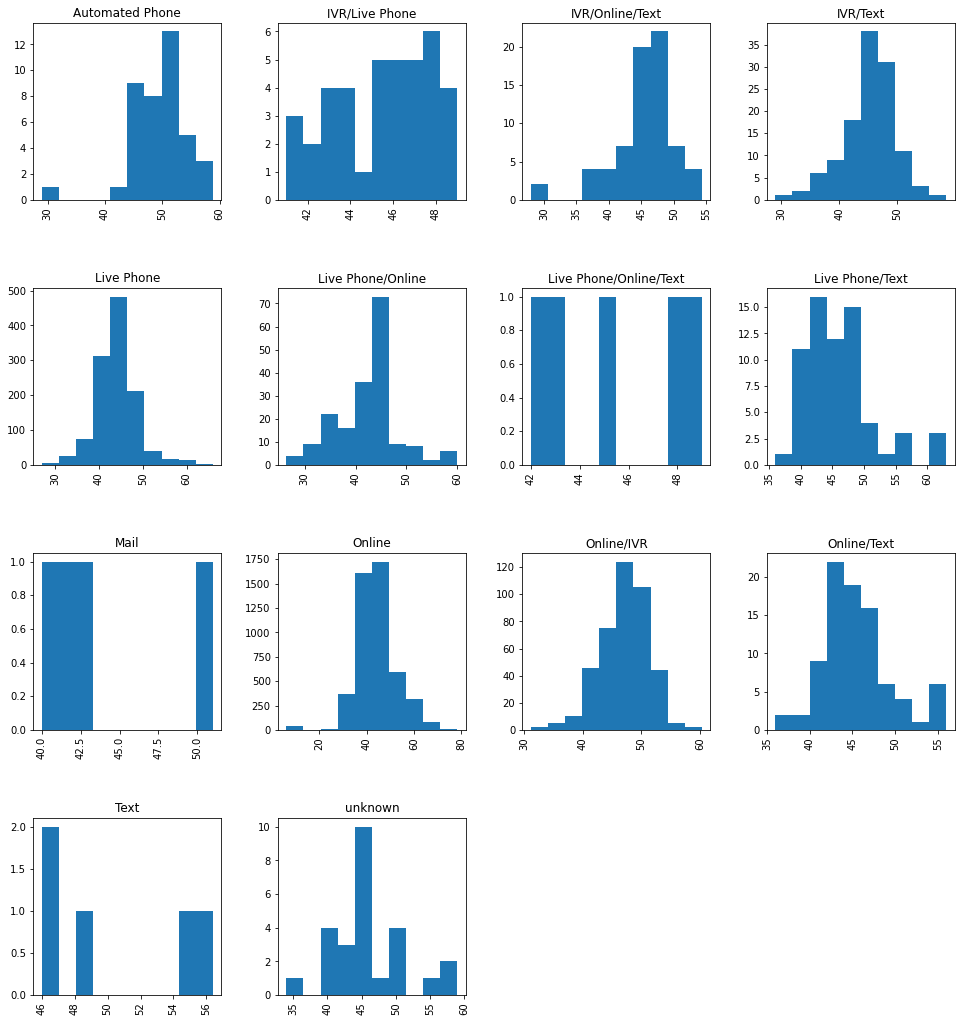

In [23]:
Trump_data['pct'].hist(by=Trump_data['methodology'], figsize = (16,18))

In [24]:
import numpy as np
import pingouin as pg

test = pg.homoscedasticity(Trump_data, dv='pct', group='methodology', method='levene', alpha=0.05)
test

,W,pval,equal_var
levene,28.80934,5.154570e-70,False


In [25]:
from pingouin import welch_anova
aov = welch_anova(dv='pct', between='methodology', data=Trump_data)
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,methodology,13,66.674812,18.589227,2.529143e-17,0.015648


In [33]:
post_hoc = pg.pairwise_gameshowell(data=Trump_data, dv='pct',
                        between='methodology').round(3)
post_hoc = post_hoc[post_hoc['pval'] < .05]

In [34]:
pd.set_option('display.max_rows', 500)
display(post_hoc)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Automated Phone,IVR/Live Phone,49.307,45.446,3.861,0.867,4.451,55.132,0.001,0.992
1,Automated Phone,IVR/Online/Text,49.307,45.252,4.055,0.966,4.196,77.585,0.003,0.826
2,Automated Phone,IVR/Text,49.307,45.021,4.286,0.892,4.804,63.007,0.001,0.873
3,Automated Phone,Live Phone,49.307,44.039,5.268,0.798,6.604,41.357,0.001,1.061
4,Automated Phone,Live Phone/Online,49.307,42.548,6.759,0.903,7.483,66.547,0.001,1.300
8,Automated Phone,Online,49.307,44.035,5.272,0.795,6.631,40.822,0.001,1.053
10,Automated Phone,Online/Text,49.307,45.042,4.265,0.899,4.743,64.030,0.001,0.901
15,IVR/Live Phone,Live Phone,45.446,44.039,1.407,0.391,3.600,49.095,0.031,0.585
16,IVR/Live Phone,Live Phone/Online,45.446,42.548,2.898,0.576,5.027,160.501,0.001,0.883
20,IVR/Live Phone,Online,45.446,44.035,1.411,0.386,3.660,46.496,0.026,0.588


# Conclusions

A Welch's Anova was chosen to analyze these data based on the heteroscedastic nature of the data. Histogram plots, the normality tests, and the Anderson-Darling Test all revealed a non-normal distribution of the data. However, research literature has indicated that heteroscedasticity is a greater issue when considering the statistical robustness of F-value. Due to this, a statistical test geared towards data with unequal variance was chosen. The result of this Welch's Anova show that there was a signficant difference in President Trump's Polling Numbers based on polling methodology. A Games-Howell post-hoc test revealed the specific polling methods where significant differences in President Trump's polling numbers were detected.